In [246]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from skimage import io
import plotly.express as px 
import folium
%matplotlib inline

In [3]:
data = pd.read_csv(r'C:\Users\atoma\Downloads\corona-virus-report\covid_19_clean_complete.csv')

In [4]:
data

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Afghanistan,33.000000,65.000000,1/22/20,0,0,0
1,NaN,Albania,41.153300,20.168300,1/22/20,0,0,0
2,NaN,Algeria,28.033900,1.659600,1/22/20,0,0,0
3,NaN,Andorra,42.506300,1.521800,1/22/20,0,0,0
4,NaN,Angola,-11.202700,17.873900,1/22/20,0,0,0
5,NaN,Antigua and Barbuda,17.060800,-61.796400,1/22/20,0,0,0
6,NaN,Argentina,-38.416100,-63.616700,1/22/20,0,0,0
7,NaN,Armenia,40.069100,45.038200,1/22/20,0,0,0
8,Australian Capital Territory,Australia,-35.473500,149.012400,1/22/20,0,0,0
9,New South Wales,Australia,-33.868800,151.209300,1/22/20,0,0,0


In [5]:
data.isnull().sum()

Province/State    16198
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
dtype: int64

In [184]:
data['Deaths'].min()

-1

In [6]:
len(data)

23318

In [78]:
data['Deaths'].max()

40661

C:\Users\atoma\Anaconda3\lib\site-packages\matplotlib\collections.py:857: RuntimeWarning:

invalid value encountered in sqrt



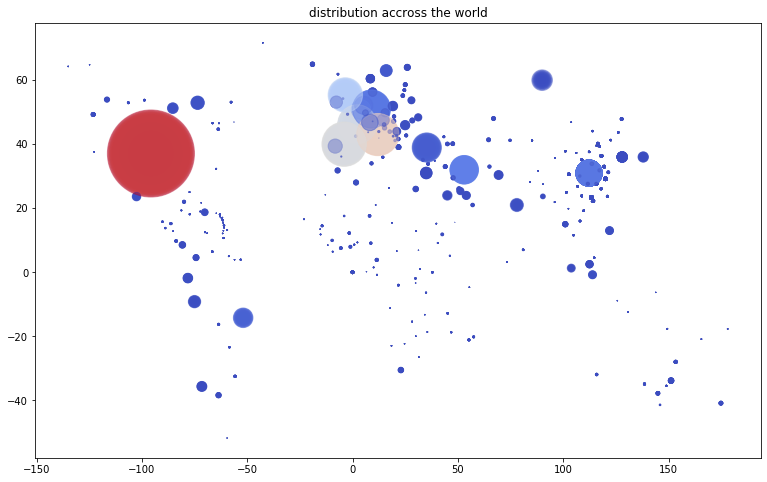

In [247]:
np.random.seed(19680801)
colors = np.random.rand(23318)
plt.figure(figsize=(13,8))
temp = data
#image = io.imread("https://www.mapsofworld.com/style_2019/images/world-best-continents-map.jpg")
#plt.imshow(image)
plt.scatter(x = 'Long' , y='Lat'  , data = temp,
            c = temp['Deaths']/4000 ,cmap = 'coolwarm',
            alpha = 0.4 , 
            s = data['Confirmed']*0.01)
plt.title('distribution accross the world')
plt.show()

In [179]:
temp = data.groupby('Date')['Recovered', 'Deaths', 'active'].sum().reset_index()
temp = temp.melt(id_vars="Date", value_vars=['Recovered', 'Deaths', 'active'],
                 var_name='Case', value_name='Count')
temp.head()

fig = px.area(temp, x="Date", y="Count", color='Case', height=600,
             title='Cases over time')
fig.update_layout(xaxis_rangeslider_visible=True)
fig.show()

In [198]:
temp = data[data['Date'] == max(data['Date'])]

m = folium.Map(location=[0, 0], tiles='cartodbpositron',
               min_zoom=1, max_zoom=4, zoom_start=1)

for i in range(0, len(temp)):
    folium.Circle(
        location=[temp.iloc[i]['Lat'], temp.iloc[i]['Long']],
        color='crimson', fill='crimson',
        tooltip =   '<li><bold>Country : '+str(temp.iloc[i]['Country/Region'])+
                    '<li><bold>Province : '+str(temp.iloc[i]['Province/State'])+
                    '<li><bold>Confirmed : '+str(temp.iloc[i]['Confirmed'])+
                    '<li><bold>Deaths : '+str(temp.iloc[i]['Deaths']),
        radius=int(temp.iloc[i]['Confirmed'])**1.1).add_to(m)
    


In [199]:
m

TypeError: Object of type complex is not JSON serializable

In [8]:
data['Date'] = pd.to_datetime(data['Date'])

In [9]:
data['Month'] = data['Date'].apply(lambda date : date.month)

In [10]:
data['Month']

0        1
1        1
2        1
3        1
4        1
5        1
6        1
7        1
8        1
9        1
10       1
11       1
12       1
13       1
14       1
15       1
16       1
17       1
18       1
19       1
20       1
21       1
22       1
23       1
24       1
25       1
26       1
27       1
28       1
29       1
        ..
23288    4
23289    4
23290    4
23291    4
23292    4
23293    4
23294    4
23295    4
23296    4
23297    4
23298    4
23299    4
23300    4
23301    4
23302    4
23303    4
23304    4
23305    4
23306    4
23307    4
23308    4
23309    4
23310    4
23311    4
23312    4
23313    4
23314    4
23315    4
23316    4
23317    4
Name: Month, Length: 23318, dtype: int64

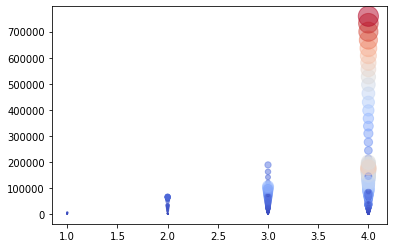

In [85]:
plt.scatter(x='Month' , y = 'Confirmed' , data = data , alpha=0.5,c = temp['Deaths']/4000 ,cmap = 'coolwarm',s = data['Deaths']*0.01)

In [12]:
data_india = data[data['Country/Region'] == 'India']

In [13]:
data_india

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Month
131,NaN,India,21.0,78.0,2020-01-22,0,0,0,1
393,NaN,India,21.0,78.0,2020-01-23,0,0,0,1
655,NaN,India,21.0,78.0,2020-01-24,0,0,0,1
917,NaN,India,21.0,78.0,2020-01-25,0,0,0,1
1179,NaN,India,21.0,78.0,2020-01-26,0,0,0,1
1441,NaN,India,21.0,78.0,2020-01-27,0,0,0,1
1703,NaN,India,21.0,78.0,2020-01-28,0,0,0,1
1965,NaN,India,21.0,78.0,2020-01-29,0,0,0,1
2227,NaN,India,21.0,78.0,2020-01-30,1,0,0,1
2489,NaN,India,21.0,78.0,2020-01-31,1,0,0,1


In [172]:
data['active'] = data['Confirmed'] - data['Deaths'] - data['Recovered']

C:\Users\atoma\Anaconda3\lib\site-packages\matplotlib\collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


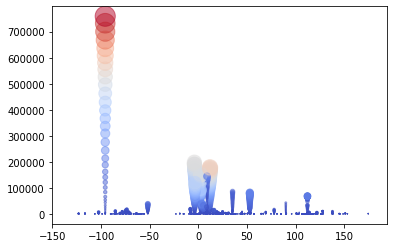

In [173]:
plt.scatter(x='Long' ,y = 'Confirmed' , data = data ,  alpha=0.5,c = temp['Deaths']/4000 ,cmap = 'coolwarm',s = data['Deaths']*0.01 )

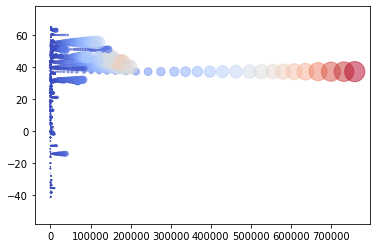

In [87]:
plt.scatter(x='Confirmed' ,y = 'Lat' , data = data ,  alpha=0.5,c = temp['Deaths']/4000 ,cmap = 'coolwarm',s = data['Deaths']*0.01 )

C:\Users\atoma\Anaconda3\lib\site-packages\matplotlib\collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


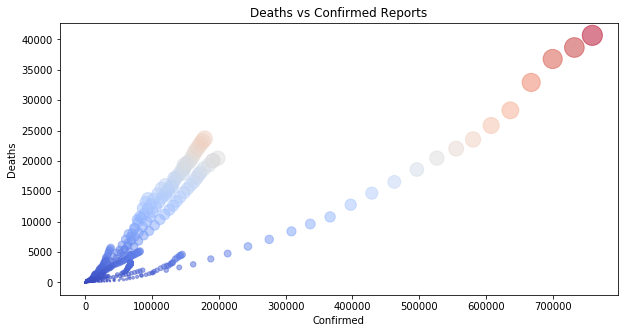

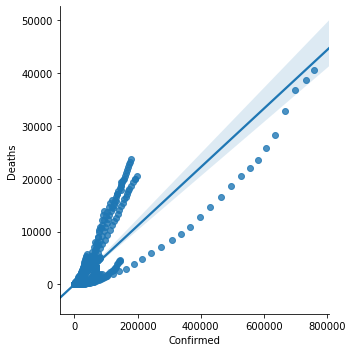

In [99]:
plt.figure(figsize = (10,5))
plt.scatter(x='Confirmed' ,y = 'Deaths' , data = data ,
            alpha=0.5,c = temp['Deaths']/4000 ,cmap = 'coolwarm',
            s = data['Deaths']*0.01)
plt.title('Deaths vs Confirmed Reports')
plt.xlabel('Confirmed')
plt.ylabel('Deaths')
sns.lmplot(x= 'Confirmed' , y = 'Deaths' , data=data)
plt.show()

In [100]:
data.corr()

,Lat,Long,Confirmed,Deaths,Recovered,Month
Lat,1.000000e+00,-1.297008e-01,0.069312,0.070730,0.062853,1.624021e-17
Long,-1.297008e-01,1.000000e+00,-0.032601,-0.029591,0.036809,1.571664e-17
Confirmed,6.931171e-02,-3.260104e-02,1.000000,0.872519,0.648348,1.136148e-01
Deaths,7.073004e-02,-2.959055e-02,0.872519,1.000000,0.650108,1.105264e-01
Recovered,6.285317e-02,3.680929e-02,0.648348,0.650108,1.000000,1.159756e-01
Month,1.624021e-17,1.571664e-17,0.113615,0.110526,0.115976,1.000000e+00


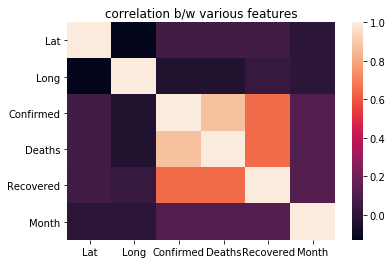

In [106]:
sns.heatmap(data.corr())
plt.title('correlation b/w various features')
plt.show()

In [147]:
X = data[['Lat', 'Long', 'Confirmed','Month']]
y = data['Deaths']

In [148]:
from sklearn.preprocessing import MinMaxScaler

In [149]:
scaler = MinMaxScaler()

In [150]:
transformed_X = scaler.fit_transform(X)

In [229]:
data

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Month,active
0,NaN,Afghanistan,33.000000,65.000000,2020-01-22,0,0,0,1,0
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,1,0
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,1,0
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,1,0
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,1,0
5,NaN,Antigua and Barbuda,17.060800,-61.796400,2020-01-22,0,0,0,1,0
6,NaN,Argentina,-38.416100,-63.616700,2020-01-22,0,0,0,1,0
7,NaN,Armenia,40.069100,45.038200,2020-01-22,0,0,0,1,0
8,Australian Capital Territory,Australia,-35.473500,149.012400,2020-01-22,0,0,0,1,0
9,New South Wales,Australia,-33.868800,151.209300,2020-01-22,0,0,0,1,0


In [151]:
data.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', 'Date', 'Confirmed',
       'Deaths', 'Recovered', 'Month'],
      dtype='object')

In [156]:
from sklearn.model_selection import train_test_split

In [157]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [158]:
from sklearn.linear_model import LinearRegression

In [159]:
lmodel = LinearRegression()

In [160]:
lmodel.fit(X_train , y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [163]:
lmodel.score(X_test , y_test)

0.6951529988938772

In [164]:
from sklearn.linear_model import BayesianRidge

In [168]:
b_lmodel = BayesianRidge(tol=1e-6)

In [169]:
b_lmodel.fit(X_train , y_train)

BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, compute_score=False, copy_X=True,
              fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
              normalize=False, tol=1e-06, verbose=False)

In [170]:
b_lmodel.score(X_test , y_test)

0.694963357485463

In [203]:
from sklearn.svm import SVC

In [204]:
svc_model = SVC()

In [206]:
svc_model.fit(X_train, y_train)

C:\Users\atoma\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.



SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [208]:
svc_model.score(X_test, y_test)

0.7805889079473985

In [225]:
y_pred = svc_model.predict(X_test)

In [217]:
date_data = data.groupby(['Date']).sum()

In [239]:
px.line(date_data , y ='Deaths')

In [242]:
px.line(date_data, y = y_test )

In [244]:
px.line(date_data, y = y_pred)